In [1]:
import sys

import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

sys.path.append('..')
from tools import audio_tools, meta_tools

In [2]:
source = audio_tools.in_out.init_audio(r'F:\Work2\drum-onset-detection\data\IDMT-SMT-DRUMS-V2\audio\RealDrum01_00#MIX.wav')
audio, sr = audio_tools.in_out.read_audio(source)
audio.shape

(779776,)

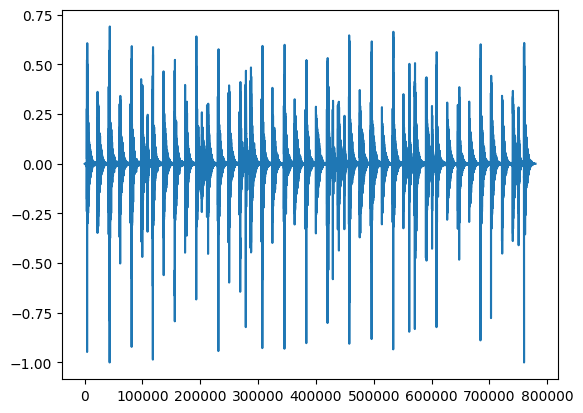

In [3]:
ipd.display(ipd.Audio(audio, rate=sr, normalize=False))
plt.plot(audio)
plt.show()

In [4]:
annotations = meta_tools.in_out.read_annotations(r"F:\Work2\drum-onset-detection\data\IDMT-SMT-DRUMS-V2\annotation_xml\RealDrum01_00#MIX.xml")
len(annotations)

86

In [5]:
hats = [annotation for annotation in annotations if annotation.instrument=="HH"]
len(hats)

42

In [6]:
def seconds_to_samples(seconds: float, sr: int):
    """
    Convert a time in seconds, assumed to be relative to 0 seconds,
     to a number of samples elapsed since 0 seconds, given a specified
     sampling rate.
    
    :param seconds: (float) A time in seconds.
    :param sr: The sampling rate, in Hz.

    :return: The number of samples elapsed at the given time.
    """

    return round(seconds * sr)

def construct_annotation_matrix(annotations: list, audio: np.array, sr: int):
    """
    Construct a binary matrix to represent the presence of annotations
     at each sample in a file.

    :param annotations: (list) Placeholder
    :param audio: (np.array) Placeholder
    :param sr: (int) The sampling rate, in Hz.

    :return: Placeholder
    """
    
    # Get each unique instrument in our annotation
    instruments = np.unique([annotation.instrument for annotation in annotations])
    num_instruments = len(instruments)
    index_instrument_mapping = dict(enumerate(instruments))

    # Construct an empty array, the same size as our input audio
    annotation_matrix = np.zeros_like(audio, dtype=bool)
    # Stack this array `num_instruments` times, over the first axis
    # We now have a matrix, in which each instrument has a single row of annotations
    annotation_matrix = np.stack([annotation_matrix] * num_instruments, axis=0)
    # We will populate each cell (or sample) in each row with `True` values
    # if an Annotation is reporting an onset of that row's instrument at that sample
    # and otherwise leave these values `False`.

    # For each unique instrument...
    for instrument_index, instrument in enumerate(instruments):
        # ... get all of the Annotations containing this instrument
        instrument_annotations = (annotation for annotation in annotations if annotation.instrument == instrument)
        # For each Annotation containing our instrument...
        for annotation in instrument_annotations:
            # ... get the Annotation's onset in samples and set this sample `True`
            onset_samples = seconds_to_samples(annotation.onset_sec, sr)
            annotation_matrix[instrument_index][onset_samples] = True
    return annotation_matrix, index_instrument_mapping

In [7]:
annotation_matrix, index_instrument_mapping = construct_annotation_matrix(annotations, audio, sr)

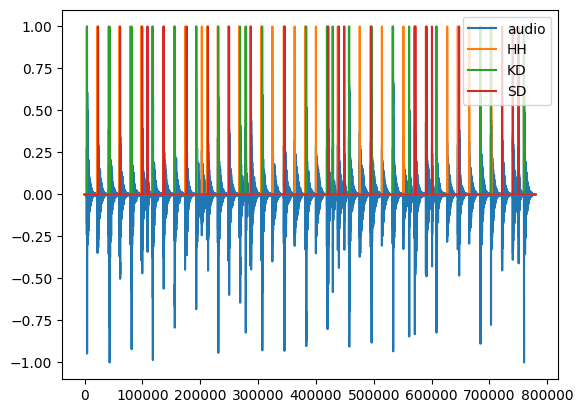

In [8]:
plt.plot(audio, label='audio')
for instrument_index in range(annotation_matrix.shape[0]):
    plt.plot(annotation_matrix[instrument_index], label=index_instrument_mapping[instrument_index])
plt.legend(loc='upper right')
plt.show()